In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# define style for figures
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette("Paired")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

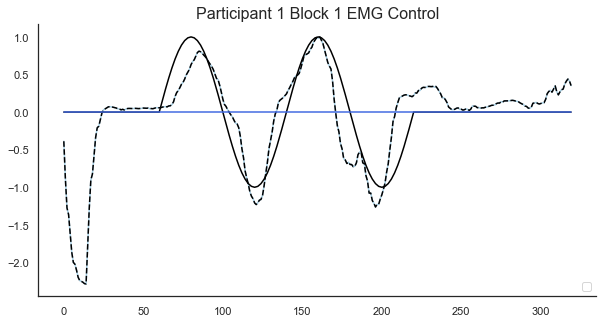

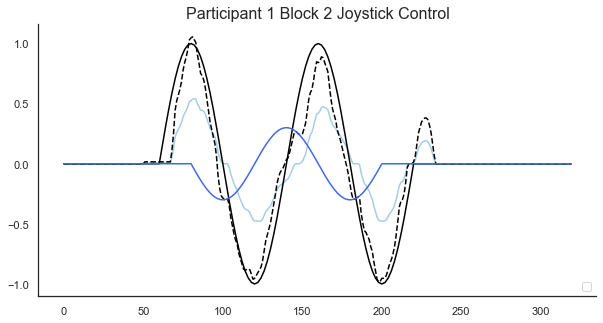

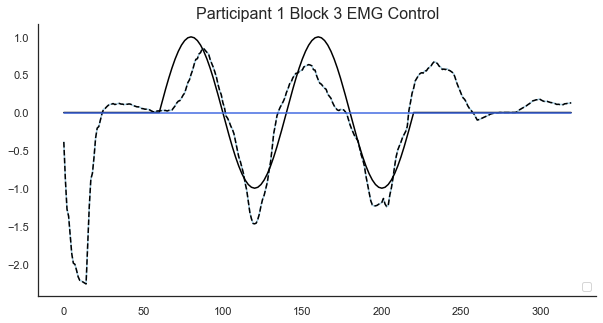

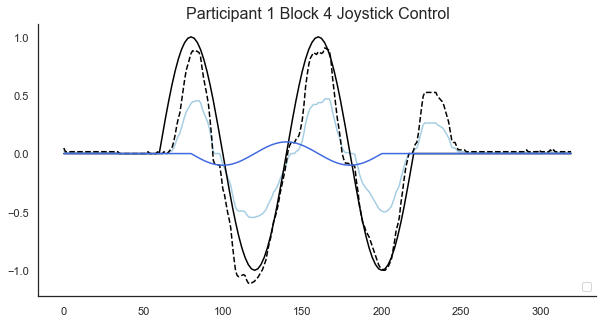

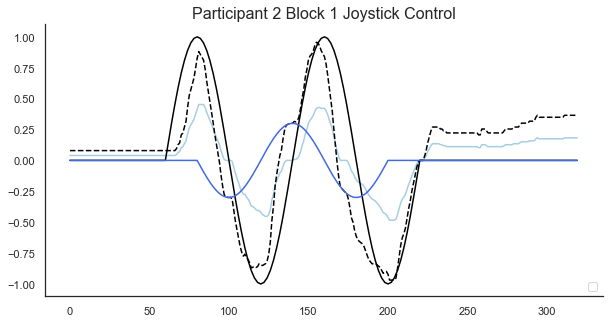

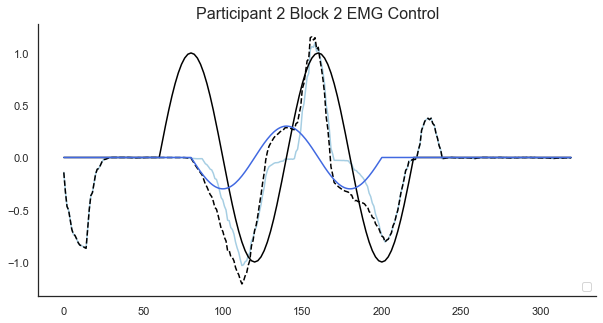

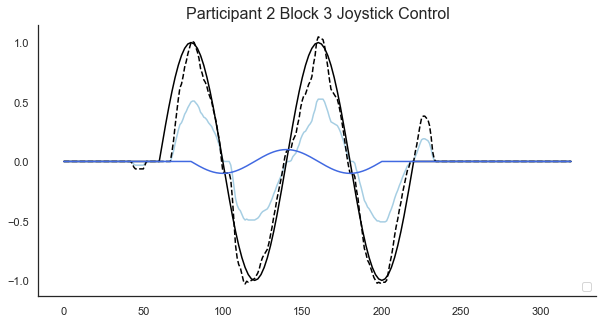

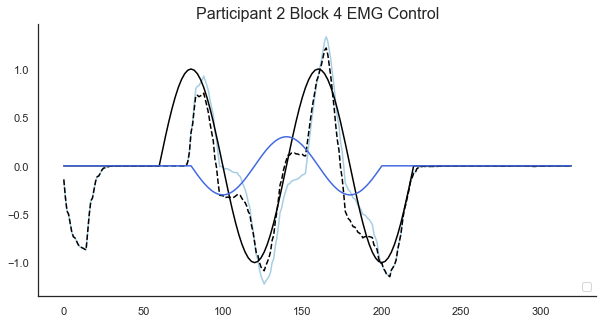

In [8]:
# Read in training data
current_directory = os.getcwd()

# data to read in: SN, BN
data = []

# participants
# participants = ('SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN009', 'SN010', 'SN011', 'SN012', 'SN013', 'SN014', 'SN015')
participants = ('SN001', 'SN002')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            trials = pd.read_csv(os.path.join(b, 'trials.csv'),)  
        
        plt.figure(figsize=(10,5))
                   
        if  trials["emg"][0] == 1: 
            if os.path.isfile(os.path.join(b, 'data_proc.hdf5')):
                data_proc = h5py.File(os.path.join(b, 'data_proc.hdf5'),)
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),) 
            if os.path.isfile(os.path.join(b, 'noise.hdf5')):
                noise = h5py.File(os.path.join(b, 'noise.hdf5'),) 
            if os.path.isfile(os.path.join(b, 'wave.hdf5')):
                wave = h5py.File(os.path.join(b, 'wave.hdf5'),) 
            
            sns.lineplot(data=data_proc['1'][0:][0]-data_proc['1'][0:][1])
            sns.lineplot(data=wave['1'][0:], color='black')
            sns.lineplot(data=cursor_position['1'][0:], linestyle='dashed', color='black')
            sns.lineplot(data=noise['1'][0:], color = 'royalblue')
            plt.title(f'Participant {SN} Block {BN} EMG Control', fontsize=16)
            plt.legend(loc="lower right")
            sns.despine()
        
        if  trials["emg"][0] == 0: 
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),)
            if os.path.isfile(os.path.join(b, 'data_raw.hdf5')):
                data_raw = h5py.File(os.path.join(b, 'data_raw.hdf5'),)
            if os.path.isfile(os.path.join(b, 'noise.hdf5')):
                noise = h5py.File(os.path.join(b, 'noise.hdf5'),) 
            if os.path.isfile(os.path.join(b, 'wave.hdf5')):
                wave = h5py.File(os.path.join(b, 'wave.hdf5'),) 
            
            
            sns.lineplot(data=data_raw['1'][0:][1]-data_raw['1'][0:][0])           
            sns.lineplot(data=wave['1'][0:], color='black')
            sns.lineplot(data=cursor_position['1'][0:], linestyle='dashed', color='black')
            sns.lineplot(data=noise['1'][0:], color = 'royalblue')
            plt.title(f'Participant {SN} Block {BN} Joystick Control', fontsize=16)
            plt.legend(loc="lower right")
            sns.despine()